In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_data_dir = 'NewData/Dataset/Train'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)


Found 1213 images belonging to 4 classes.


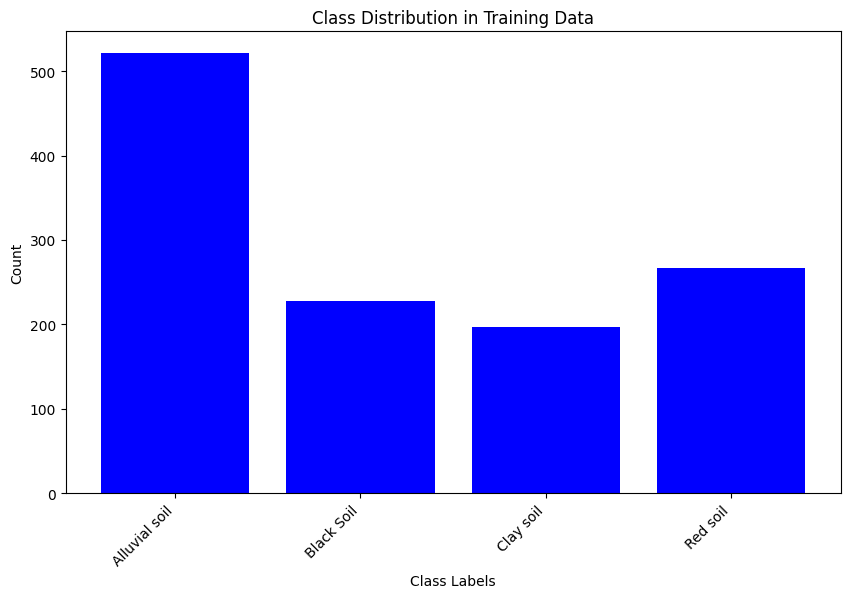

In [4]:
import matplotlib.pyplot as plt
import numpy as np
class_labels = list(train_generator.class_indices.keys())
class_counts = train_generator.classes
class_distribution = [np.sum(class_counts == i) for i in range(len(class_labels))]

plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_distribution, color='blue')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution in Training Data')
plt.xticks(rotation=45, ha='right')  
plt.show()


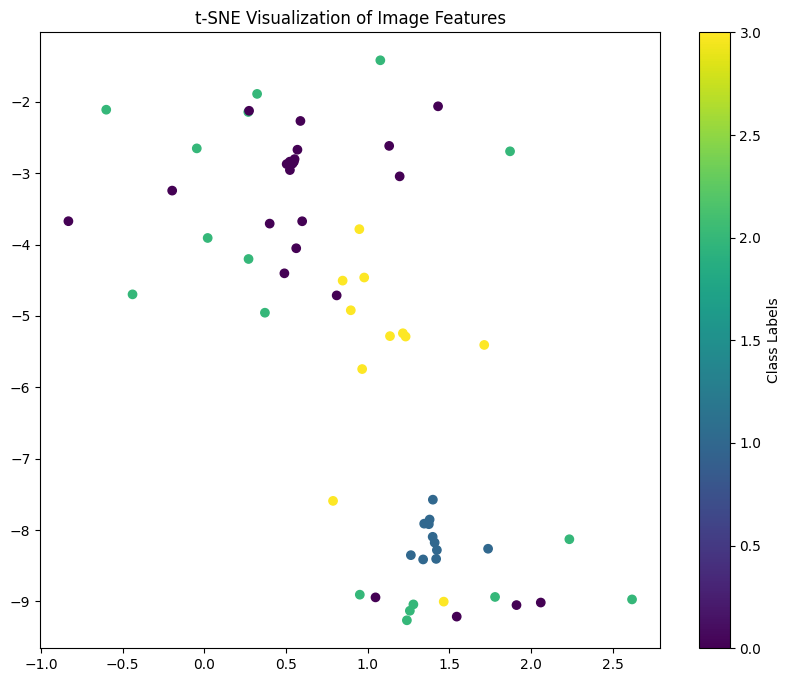

In [8]:
from sklearn.manifold import TSNE
batch_size = 64
images, labels = train_generator.next()
reshaped_images = images.reshape((batch_size, -1))
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(reshaped_images)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=np.argmax(labels, axis=1), cmap='viridis')
plt.title('t-SNE Visualization of Image Features')
plt.colorbar(scatter, label='Class Labels')
plt.show()


In [6]:
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers[:200]:
    layer.trainable = False
for layer in base_model.layers[200:]:
    layer.trainable = True
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x) 
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
early_stopping = EarlyStopping(monitor='acc', patience=5, restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

inception_hist = model.fit(train_generator, 
                           steps_per_epoch=len(train_generator),
                           epochs=10,
                           callbacks=[early_stopping])

print("Final Accuracy: ", inception_hist.history['acc'][-1])

Epoch 1/10
19/19 [==============================] - 23s 888ms/step - loss: 0.5922 - acc: 0.7405
Epoch 2/10
19/19 [==============================] - 16s 835ms/step - loss: 0.5694 - acc: 0.7500
Epoch 3/10
19/19 [==============================] - 16s 836ms/step - loss: 0.5695 - acc: 0.7500
Epoch 4/10
19/19 [==============================] - 16s 833ms/step - loss: 0.5682 - acc: 0.7500
Epoch 5/10
19/19 [==============================] - 16s 819ms/step - loss: 0.5674 - acc: 0.7500
Epoch 6/10
19/19 [==============================] - 16s 840ms/step - loss: 0.5664 - acc: 0.7500
Epoch 7/10
19/19 [==============================] - 16s 837ms/step - loss: 0.5664 - acc: 0.7500
Final Accuracy:  0.75


In [7]:
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers[:200]:
    layer.trainable = False
for layer in base_model.layers[200:]:
    layer.trainable = True
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x) 
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)
early_stopping = EarlyStopping(monitor='acc', patience=5, restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

inception_hist = model.fit(train_generator, 
                           steps_per_epoch=len(train_generator),
                           epochs=10,
                           callbacks=[early_stopping])

print("Final Accuracy: ", inception_hist.history['acc'][-1])

Epoch 1/10
19/19 [==============================] - 18s 827ms/step - loss: 0.6495 - acc: 0.6997
Epoch 2/10
19/19 [==============================] - 16s 828ms/step - loss: 0.6168 - acc: 0.7244
Epoch 3/10
19/19 [==============================] - 16s 844ms/step - loss: 0.5937 - acc: 0.7393
Epoch 4/10
 6/19 [========>.....................] - ETA: 10s - loss: 0.5854 - acc: 0.7474

KeyboardInterrupt: 

In [12]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

input_tensor = Input(shape=(224, 224, 3))
x = Conv2D(64, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_tensor = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input_tensor, outputs=output_tensor)
early_stopping = EarlyStopping(monitor='acc', patience=5, restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])
cnn_hist = model.fit(train_generator,
                     steps_per_epoch=len(train_generator),
                     epochs=10,
                     callbacks=[early_stopping])

print("Final Accuracy: ", cnn_hist.history['acc'][-1])

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/model_4/max_pooling2d_10/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "d:\Miniconda\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "d:\Miniconda\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "d:\Miniconda\envs\tf\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "d:\Miniconda\envs\tf\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "d:\Miniconda\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "d:\Miniconda\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "d:\Miniconda\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "d:\Miniconda\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "d:\Miniconda\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "d:\Miniconda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "d:\Miniconda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "d:\Miniconda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "d:\Miniconda\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "d:\Miniconda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "d:\Miniconda\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "d:\Miniconda\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "d:\Miniconda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "d:\Miniconda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "d:\Miniconda\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "d:\Miniconda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "d:\Miniconda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "d:\Miniconda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Aaron Antony Noronha\AppData\Local\Temp\ipykernel_17632\910788520.py", line 23, in <module>
      cnn_hist = model.fit(train_generator,
    File "d:\Miniconda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "d:\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "d:\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "d:\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "d:\Miniconda\envs\tf\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "d:\Miniconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "d:\Miniconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "d:\Miniconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model_4/max_pooling2d_10/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,222,222,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model_4/max_pooling2d_10/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_36197]